In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
import numpy as np
import os

In [2]:
IMAGE_SHAPE = (128, 128, 3)
CLASS_ONE = "Mundo4"

TRAIN_DATA_FILES = ["./DataNous/Caso_Facil/Entrenamiento/Mundo4/*.png", "./DataNous/Caso_Facil/Entrenamiento/Mundo7/*.png"]
VALIDATION_DATA_FILES = ["./DataNous/Caso_Facil/Validacion/Mundo4/*.png", "./DataNous/Caso_Facil/Validacion/Mundo7/*.png"]

CHECKPOINTS = "./DataNous/Caso_Facil/Checkpoints/Caso_Facil_{epoch:04d}.h5"

BATCH_SIZE = 32

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), strides=(2,2), padding='same', input_shape=IMAGE_SHAPE))
model.add(tf.keras.layers.Conv2D(32, (3,3), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16385     
Total params: 39,969
Trainable params: 39,969
Non-trainable params: 0
_________________________________________________________________


In [4]:
def process_dataset(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    label = parts[-2]
    label = label == CLASS_ONE
    label = tf.cast(label, dtype=tf.float32)

    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image)
    image = tf.image.resize(image, (128, 128))
    image = (tf.image.convert_image_dtype(image, tf.float32) / 127.5) - 1

    return image, label

In [5]:
train_dataset = tf.data.Dataset.list_files(TRAIN_DATA_FILES)
train_dataset = train_dataset.map(process_dataset, tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1024, reshuffle_each_iteration=True)
train_dataset = train_dataset.batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

validation_dataset = tf.data.Dataset.list_files(VALIDATION_DATA_FILES)
validation_dataset = validation_dataset.map(process_dataset, tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
Loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=Optimizer,
               loss=Loss,
               metrics=['binary_accuracy'])

checkpoints = tf.keras.callbacks.ModelCheckpoint(CHECKPOINTS,
                                                 save_best_only=True,
                                                 monitor='binary_accuracy')

In [7]:
initial_epochs = 30
num_batches = np.ceil(len(list(tf.data.Dataset.list_files(TRAIN_DATA_FILES))) / BATCH_SIZE)
num_batches

363.0

In [8]:
history = model.fit(x=train_dataset,
                       shuffle=True,
                       #verbose=2,
                       callbacks=[checkpoints], #, TensorBoard],
                       steps_per_epoch=num_batches,
                       epochs=initial_epochs,
                       validation_data=validation_dataset,
                       initial_epoch=0)

Train for 363.0 steps, validate for 41 steps
Epoch 1/30
363/363 [==============================] - 102s 280ms/step - loss: 1.3607 - binary_accuracy: 0.5195 - val_loss: 1.1638 - val_binary_accuracy: 0.5287
Epoch 2/30
363/363 [==============================] - 119s 329ms/step - loss: 0.8876 - binary_accuracy: 0.5182 - val_loss: 0.8439 - val_binary_accuracy: 0.5109
Epoch 3/30
363/363 [==============================] - 102s 282ms/step - loss: 0.8205 - binary_accuracy: 0.5177 - val_loss: 0.8159 - val_binary_accuracy: 0.5116
Epoch 4/30
363/363 [==============================] - 98s 269ms/step - loss: 0.7914 - binary_accuracy: 0.5289 - val_loss: 0.7722 - val_binary_accuracy: 0.5271
Epoch 5/30
363/363 [==============================] - 103s 285ms/step - loss: 0.7619 - binary_accuracy: 0.5395 - val_loss: 0.7567 - val_binary_accuracy: 0.5333
Epoch 6/30
363/363 [==============================] - 98s 271ms/step - loss: 0.7344 - binary_accuracy: 0.5566 - val_loss: 0.7374 - val_binary_accuracy: 0.54

In [12]:
history2 = model.fit(x=train_dataset,
                       shuffle=True,
                       #verbose=2,
                       callbacks=[checkpoints], #, TensorBoard],
                       steps_per_epoch=num_batches,
                       epochs=40,
                       validation_data=validation_dataset,
                       initial_epoch=30)

Train for 363.0 steps, validate for 41 steps
Epoch 31/40
363/363 [==============================] - 100s 276ms/step - loss: 0.1230 - binary_accuracy: 0.9693 - val_loss: 0.1273 - val_binary_accuracy: 0.9636
Epoch 32/40
363/363 [==============================] - 103s 283ms/step - loss: 0.1073 - binary_accuracy: 0.9762 - val_loss: 0.1141 - val_binary_accuracy: 0.9721
Epoch 33/40
363/363 [==============================] - 121s 332ms/step - loss: 0.0921 - binary_accuracy: 0.9799 - val_loss: 0.0986 - val_binary_accuracy: 0.9822
Epoch 34/40
363/363 [==============================] - 115s 318ms/step - loss: 0.0781 - binary_accuracy: 0.9844 - val_loss: 0.0837 - val_binary_accuracy: 0.9845
Epoch 35/40
363/363 [==============================] - 97s 267ms/step - loss: 0.0668 - binary_accuracy: 0.9878 - val_loss: 0.0710 - val_binary_accuracy: 0.9853
Epoch 36/40
363/363 [==============================] - 97s 268ms/step - loss: 0.0572 - binary_accuracy: 0.9906 - val_loss: 0.0657 - val_binary_accuracy

In [13]:
history3 = model.fit(x=train_dataset,
                       shuffle=True,
                       #verbose=2,
                       callbacks=[checkpoints], #, TensorBoard],
                       steps_per_epoch=num_batches,
                       epochs=50,
                       validation_data=validation_dataset,
                       initial_epoch=40)

Train for 363.0 steps, validate for 41 steps
Epoch 41/50
363/363 [==============================] - 109s 302ms/step - loss: 0.0240 - binary_accuracy: 0.9988 - val_loss: 0.0258 - val_binary_accuracy: 0.9969
Epoch 42/50
363/363 [==============================] - 112s 309ms/step - loss: 0.0189 - binary_accuracy: 0.9991 - val_loss: 0.0228 - val_binary_accuracy: 0.9969
Epoch 43/50
363/363 [==============================] - 161s 443ms/step - loss: 0.0143 - binary_accuracy: 0.9996 - val_loss: 0.0158 - val_binary_accuracy: 0.9992
Epoch 44/50
363/363 [==============================] - 145s 398ms/step - loss: 0.0100 - binary_accuracy: 0.9998 - val_loss: 0.0122 - val_binary_accuracy: 1.0000
Epoch 45/50
363/363 [==============================] - 173s 476ms/step - loss: 0.0063 - binary_accuracy: 1.0000 - val_loss: 0.0074 - val_binary_accuracy: 1.0000
Epoch 46/50
363/363 [==============================] - 171s 472ms/step - loss: 0.0037 - binary_accuracy: 1.0000 - val_loss: 0.0044 - val_binary_accura

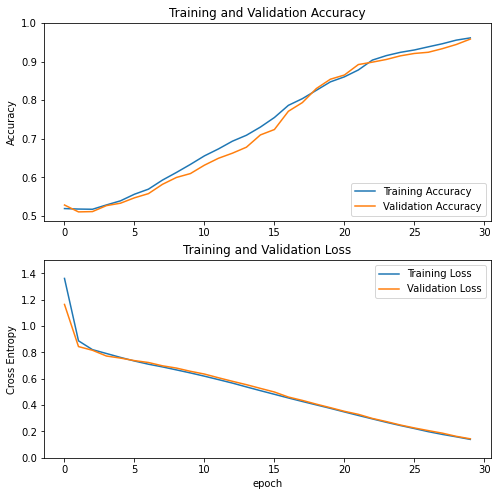

In [9]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy'] + history2.history['binary_accuracy'] + history3.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] + history2.history['val_binary_accuracy'] + history3.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()